<a href="https://colab.research.google.com/github/gaubeur/machine-learning/blob/master/primeiro_desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # biblioteca utilizada para tratar com número/vetores/matrizes
import matplotlib.pyplot as plt  # utilizada para plotar gráficos ao "estilo" matlab
import pandas as pd #biblioteca utilizada para realizar operações sobre dataframes


In [ ]:
from google.colab import files  #biblioteca do google colab utilizada para importar arquivos 
uploaded=files.upload() #importa os arquivos

Saving planilha_desafio_normalizada.csv to planilha_desafio_normalizada (1).csv


In [ ]:
import io  #biblioteca utilizada para tratar os comandos de entrada e saida
data = pd.read_csv(io.BytesIO(uploaded['planilha_desafio_normalizada.csv'])) # utilizado para importar o arquivo CSV que contém o banco de dados

In [ ]:
data.head(20) #comando utilizado para mostrar as 5 primeiras colunas do dataframe

,Unnamed: 0,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.800000,0.0000,8.000000,32.0,40.00000
1,2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.800000,0.0000,5.000000,27.0,32.00000
2,3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.750000,0.0000,3.000000,10.0,13.00000
3,4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.750000,0.0000,0.000000,1.0,1.00000
4,5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.750000,0.0896,0.000000,1.0,1.00000
5,6,7.0,2011-01-01,1.0,0.0,1.0,NaN,0.0,6.0,0.0,1.0,0.22,0.2727,0.627357,NaN,2.000000,0.0,2.00000
6,7,8.0,2011-01-01,1.0,0.0,1.0,7.0,0.0,6.0,0.0,NaN,0.20,0.2576,0.860000,0.0000,35.416317,2.0,3.00000
7,8,9.0,2011-01-01,1.0,0.0,1.0,8.0,0.0,NaN,0.0,NaN,0.24,0.2879,0.750000,0.0000,1.000000,7.0,8.00000
8,9,10.0,2011-01-01,1.0,0.0,NaN,9.0,0.0,6.0,0.0,1.0,NaN,0.3485,0.760000,0.0000,8.000000,6.0,14.00000
9,10,11.0,2011-01-01,1.0,0.0,NaN,10.0,0.0,6.0,0.0,1.0,0.38,0.3939,0.760000,0.2537,12.000000,24.0,36.00000


In [ ]:
data['cnt'] = data['cnt'].fillna((data['cnt'].mean()))
data['hum'] = data['hum'].fillna((data['hum'].mean()))
data['casual'] = data['casual'].fillna((data['casual'].mean()))


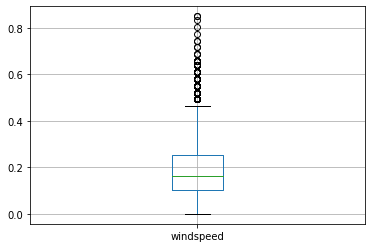

In [ ]:
#comando utilizado para gerar o boxplot
#boxplot é empregado para ver se existem outlier
data.boxplot(column='windspeed')

In [ ]:
#comando utilizado para verificar se existem dados nulos, numéricos ou não
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [ ]:
#realizando a análise de regressão
x1=data['hum'].values  #variável independente 
x2=data['casual'].values  #variável independente 
Y=data['cnt'].values #variável dependente 
x1_Reshaped=x1.reshape(-1, 1) #coloca os dados no formato 2D
x2_Reshaped=x2.reshape(-1, 1) #coloca os dados no formato 2D
x=np.column_stack((x1_Reshaped,x2_Reshaped)) #Agrupa as variaveis preditoras
#importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression

#Realiza a construção do modelo de regressão
reg = LinearRegression()
regressao = reg.fit (x,Y) # encontra os coeficientes (realiza a regressão)

#realiza a previsão
previsao = reg.predict(x)
#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(Y, previsao) #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


# variável independente 
x=data[['hum', 'casual']].values

# variável dependente
Y=data['cnt'].values

# Regressão Linear

reg = LinearRegression()
regressao = reg.fit(x, Y)
previsao = reg.predict(x)

regTree = DecisionTreeRegressor()
regressaoTree = regTree.fit(x, Y)
previsaoTree = regTree.predict(x)
print("Coeficiente de Determinação Arvore:", previsaoTree)




Y = [-99.75012328   2.21512197]X 173.29337505135362
Coeficiente de Determinação (R2): 0.4059859251122173
Coeficiente de Determinação Arvore: [141.66666667  92.03316997 103.37755996 ... 215.29990198  69.5
 251.        ]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


# variável independente 
x=data[['hum', 'casual']].values

# variável dependente
Y=data['cnt'].values

# Regressão Linear

reg = LinearRegression()
regressao = reg.fit(x, Y)
previsao = reg.predict(x)
print("regressao linear")
print(regressao);
print(previsao);

# Regressão via Árvore de Decisão

reg = DecisionTreeRegressor()
regressao = reg.fit(x, Y)
previsao = reg.predict(x)
print("regressao via arvore de decisão")
print(regressao);
print(previsao);



regressao linear
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[111.21425222 104.5688863  105.12614851 ... 191.89476367 146.22989168
 135.03725861]
regressao via arvore de decisão
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
[141.66666667  92.03316997 103.37755996 ... 215.29990198  69.5
 251.        ]


In [ ]:
TotalColTemp  = (data.temp.count() + data.temp.isna().sum());
DifPercentual = (data.temp.isna().sum() / TotalColTemp) * 100;
print(DifPercentual)



10.000575407100524


In [ ]:
data['dteday'].replace('', np.nan, inplace=True);


In [ ]:
data.dropna(subset=['dteday'], inplace=True);

In [ ]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
data.season = data.season.astype('category');

In [ ]:
data.groupby('season').count()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,,,
1.0,3095,3437,3074,3074,3065,3088,3076,3127,3088,3090,3104,3437,3111,3437,3124,3437
2.0,3192,3523,3182,3176,3182,3163,3181,3160,3171,3172,3164,3523,3164,3523,3172,3523
3.0,3266,3623,3258,3254,3260,3264,3286,3232,3240,3270,3291,3623,3261,3623,3249,3623
4.0,3091,3478,3129,3114,3148,3131,3106,3163,3137,3121,3120,3478,3136,3478,3123,3478


In [ ]:
data['dteday'].max()

'2012-12-31'

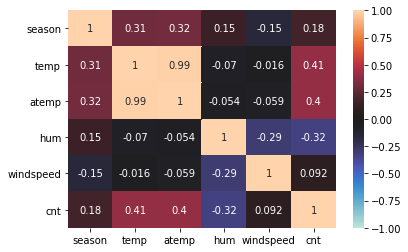

In [ ]:
new_df= data[['season','temp','atemp','hum','windspeed','cnt']]
#Atribui a matriz numa variável:
matriz_de_correlação = new_df.corr()
#importei a biblioteca
import seaborn as sn
#Plotei na tela
sn.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)


In [ ]:
data.to_csv('planilha_desafio_normalizada.csv')